## Final Practice

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
path = "../src/"
toursim = pd.read_csv(path + "data/tourism_sg.csv", sep=",")

### Question 11

<Axes: xlabel='Month'>

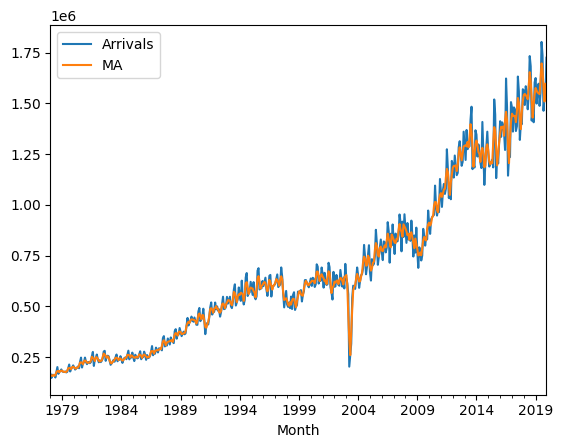

In [2]:
toursim['Month'] = pd.to_datetime(toursim['Month'])
missing_index = toursim['Arrivals'].isnull()
tmp_ids = np.where(missing_index)[0]
tmp_ids
toursim.loc[tmp_ids, 'Arrivals'] = (toursim['Arrivals'][tmp_ids - 1].values + toursim['Arrivals'][tmp_ids + 1].values) / 2
toursim['MA'] = np.nan
for ii in range(1, toursim.shape[0]-1):
    toursim.loc[ii, 'MA'] = np.mean(toursim['Arrivals'][ii-1:ii+2])
toursim.plot(x='Month', y=['Arrivals', 'MA'], kind='line')

### Question 26

In [3]:
stud_perf = pd.read_csv(path + "data/student/student-mat.csv", sep=";")

In [4]:
stud_perf.G1
stud_perf.G3
# [0,2], (2,4], (4,6], (6,8], (8,10], (10,12], (12,14], (14,16], (16,18], (18,20]
stud_perf['G1_in'] = pd.cut(stud_perf.G1, bins=[0,2,4,6,8,10,12,14,16,18,20], labels=False, include_lowest=True)
stud_perf['G3_in'] = pd.cut(stud_perf.G3, bins=[0,2,4,6,8,10,12,14,16,18,20], labels=False, include_lowest=True)
stud_perf['G1_in']

0      2
1      2
2      3
3      7
4      2
      ..
390    4
391    6
392    4
393    5
394    3
Name: G1_in, Length: 395, dtype: int64

In [ ]:
tab = pd.crosstab(stud_perf.G3_in, stud_perf.G1_in)
prop_tbl = pd.crosstab(stud_perf.G1_in, stud_perf.G3_in, normalize=True)

array([[0.00253165, 0.        , 0.00253165, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0278481 , 0.00253165, 0.02531646, 0.02025316, 0.00253165,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.03797468, 0.        , 0.02531646, 0.05822785, 0.05822785,
        0.01772152, 0.        , 0.        , 0.        , 0.        ],
       [0.02278481, 0.        , 0.00253165, 0.02278481, 0.10632911,
        0.04303797, 0.01012658, 0.        , 0.        , 0.        ],
       [0.00506329, 0.        , 0.        , 0.00253165, 0.04303797,
        0.0835443 , 0.04303797, 0.01012658, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00253165,
        0.05063291, 0.06835443, 0.03797468, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00253165, 0.02531646, 0.06582278, 0.02025316, 0.00253165],
       [0.        , 0.        , 0.       

In [6]:

for Medu, df in stud_perf.groupby('Medu'):
    prob_tab = pd.crosstab(df.G3_in, df.G1_in, normalize='all')
    prob = prob_tab.to_numpy()
    print(prob.shape)

(2, 3)
(7, 7)
(9, 7)
(9, 8)
(10, 8)


In [7]:
def eta(var1, var2, diff=0):
    tbl = pd.crosstab(var1, var2, normalize=True)
    row_vals = tbl.index.values
    col_vals = tbl.columns.values
    
    eta = 0.0
    for i in row_vals:
        for j in col_vals:
            if np.abs(i - j) <= diff:
                eta += tbl.loc[i, j]
    return eta

#eta(stud_perf.G1_bin, stud_perf.G3_bin, diff=1)
for id,df in stud_perf.groupby('Medu'):
    print(eta(df.G1_in, df.G3_in, diff=0))

0.3333333333333333
0.3898305084745763
0.3398058252427184
0.4343434343434343
0.5343511450381679
